<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/nlp_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
from google.colab import drive
import random
import numpy as np
import pandas as pd
import gzip
import nltk
from nltk import *
from nltk.corpus import webtext, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from operator import itemgetter
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from textblob import TextBlob
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [182]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [183]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("/content/gdrive/MyDrive/reviews_Apps_for_Android_5.json.gz")

In [184]:
df.shape

(752937, 9)

In [185]:
df = df.sample(n=25000)

In [186]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
450971,A2KODQS5LJGHF8,B00A42SC5E,Ameama,"[0, 0]",Iv really like this game. It's addictive. I. C...,5.0,fun,1362873600,"03 10, 2013"
659207,A3H4CEIDUOZWWV,B00F24OV8G,Steven D Wood,"[0, 0]",I have dumped scores of apps that just weren't...,4.0,A Keeper.,1400284800,"05 17, 2014"
161850,A3MG5DK147V73E,B00681ZB9A,Heather K. Peet,"[0, 2]",I wish I hadn't wasted my money on this it jus...,1.0,this stinks,1332547200,"03 24, 2012"
272961,AJ7A9GHS2Y3AX,B007VH2MYW,K.aud,"[23, 34]",The puzzles seem basically the same. Toddler w...,1.0,Dont bother,1355184000,"12 11, 2012"
516782,A7YHTBUR6HO32,B00B63HT8Q,Golden Tamaraw,"[0, 0]",Nothing special about this weather app in term...,3.0,Pedestrian in Design....But Delivers the Goods,1376006400,"08 9, 2013"


In [187]:
def preprocessing(text):
  text = re.sub("[^-9A-Za-z ]", "", text).lower()
  stop = stopwords.words("english")
  tokens = [word for word in (token for token in word_tokenize(text)) if word not in stop]
  lmtzr = nltk.WordNetLemmatizer()
  preprocessed_text = ' '.join([lmtzr.lemmatize(word) for word in tokens])
  return preprocessed_text

In [188]:
df['reviewText'] = df['reviewText'].astype(str)
df['reviewText'] = df['reviewText'].apply(preprocessing)

In [189]:
text = list(df['reviewText'])

In [190]:
print(text[0:30])

['iv really like game addictive play hour time free cant complain', 'dumped score apps werent worth time many apps havent bug worked apps dont know spell information within plane wrong others mind-numbing later ask spend much time thatdonget wrong app isnt going solve problem fun way passing time without feeling guilty intelligence sapped', 'wish hadnt wasted money waste space money know right world even mind get app please please please please get app get app forbid begone right sanity please keep sanity lost forever', 'puzzle seem basically toddler bored game froze crashed kindle many better puzzle apps', 'nothing special weather app term cool design layout engaging color map simply black-and-white taken photocopy machine object color adverse weather thats layered top mapbut delivery weather information straight point -- current weather condition temperature per set location concise forecast digest next day simple animation weather patternif one looking better-looking app term user-e

In [191]:
words = [i for item in text for i in item.split()]

In [192]:
print(words[:10])

['iv', 'really', 'like', 'game', 'addictive', 'play', 'hour', 'time', 'free', 'cant']


In [193]:
len(words)

531089

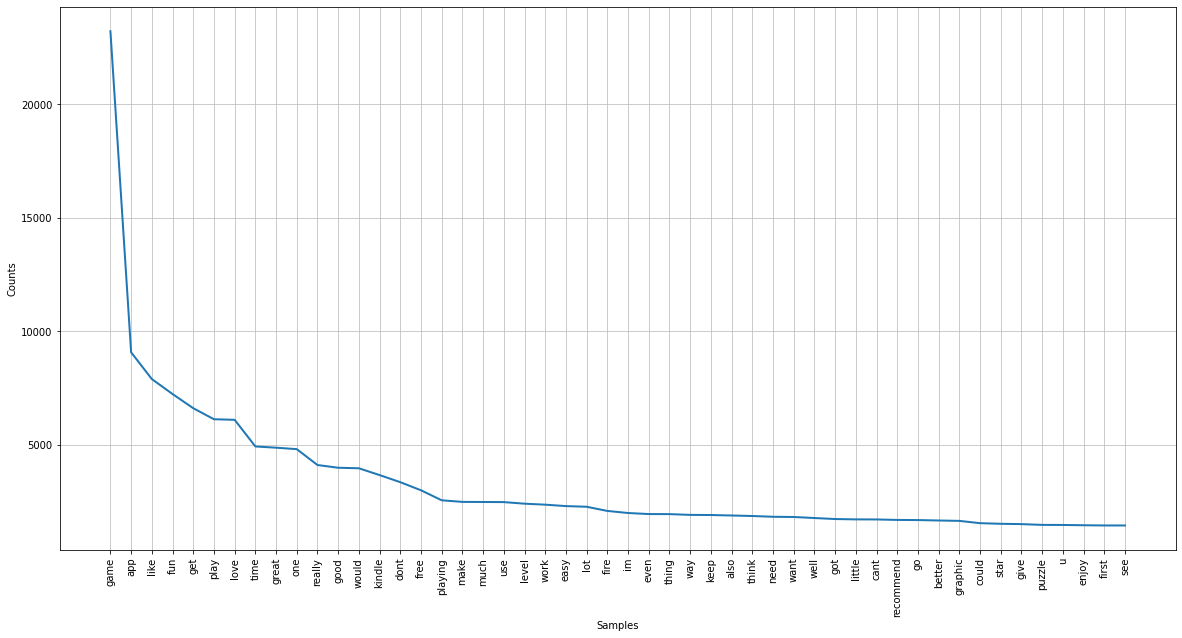

In [194]:
plt.figure(figsize=(20, 10)) 
nlp_words = nltk.FreqDist(words)
nlp_words.plot(50)

In [195]:
esBigrams = ngrams(words, 3)
esBigramFreq = collections.Counter(esBigrams)

In [196]:
esBigramFreq.most_common(10)

[(('kindle', 'fire', 'hd'), 306),
 (('hidden', 'object', 'game'), 187),
 (('best', 'game', 'ever'), 141),
 (('free', 'app', 'day'), 139),
 (('game', 'lot', 'fun'), 129),
 (('really', 'like', 'game'), 124),
 (('great', 'kindle', 'fire'), 119),
 (('game', 'really', 'fun'), 116),
 (('game', 'much', 'fun'), 102),
 (('would', 'recommend', 'anyone'), 102)]

In [197]:
esBigrams = ngrams(words, 2)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(10)

[(('kindle', 'fire'), 1788),
 (('love', 'game'), 1275),
 (('great', 'game'), 924),
 (('fun', 'game'), 920),
 (('game', 'fun'), 772),
 (('game', 'play'), 755),
 (('like', 'game'), 704),
 (('good', 'game'), 629),
 (('play', 'game'), 624),
 (('game', 'like'), 593)]

In [198]:
def adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == 'JJ']
def verbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('VB')]
def adverbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('RB')]
def nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('NN')]


In [199]:
df['Adjectives'] = df['reviewText'].apply(adjectives)
df['Verbs'] = df['reviewText'].apply(verbs)
df['Adverbs'] = df['reviewText'].apply(adverbs)
df['Nouns'] = df['reviewText'].apply(nouns)

In [200]:
def POS_freq(words):
  POS = list(words)
  POS = [y for x in POS for y in x]
  plt.figure(figsize=(20, 9)) 
  nlp_words = nltk.FreqDist(POS)
  nlp_words.plot(50)

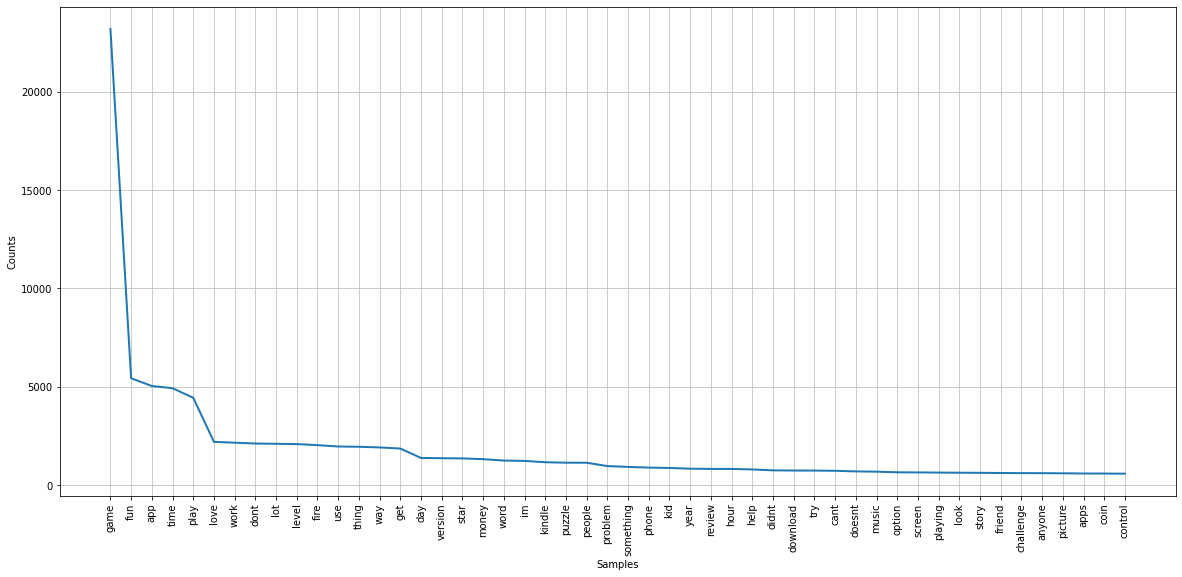

In [201]:
POS_freq(df['Nouns'])

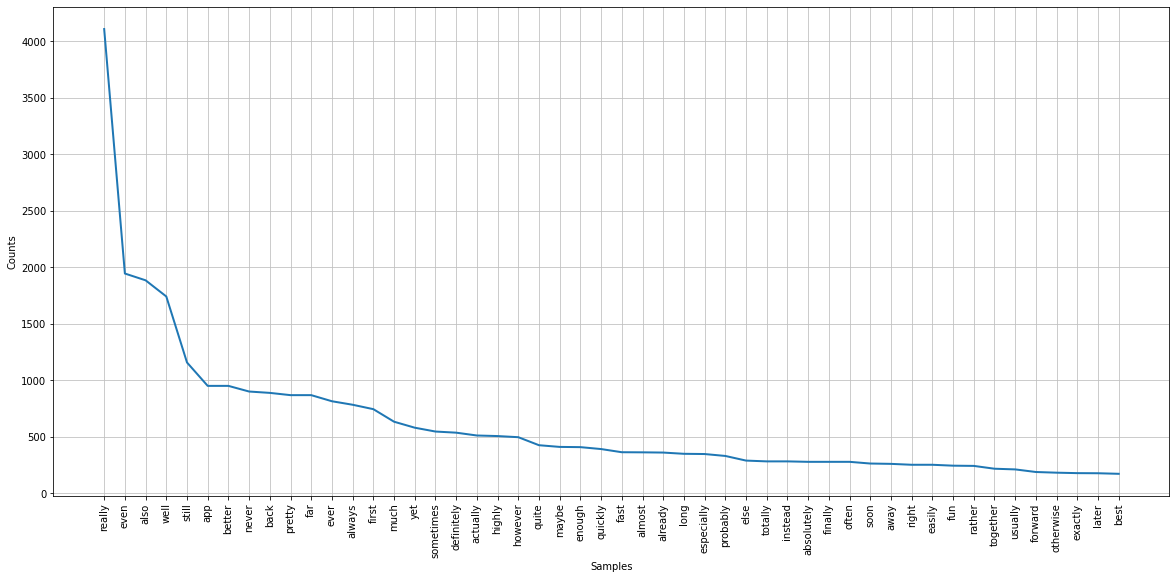

In [202]:
POS_freq(df['Adverbs'])

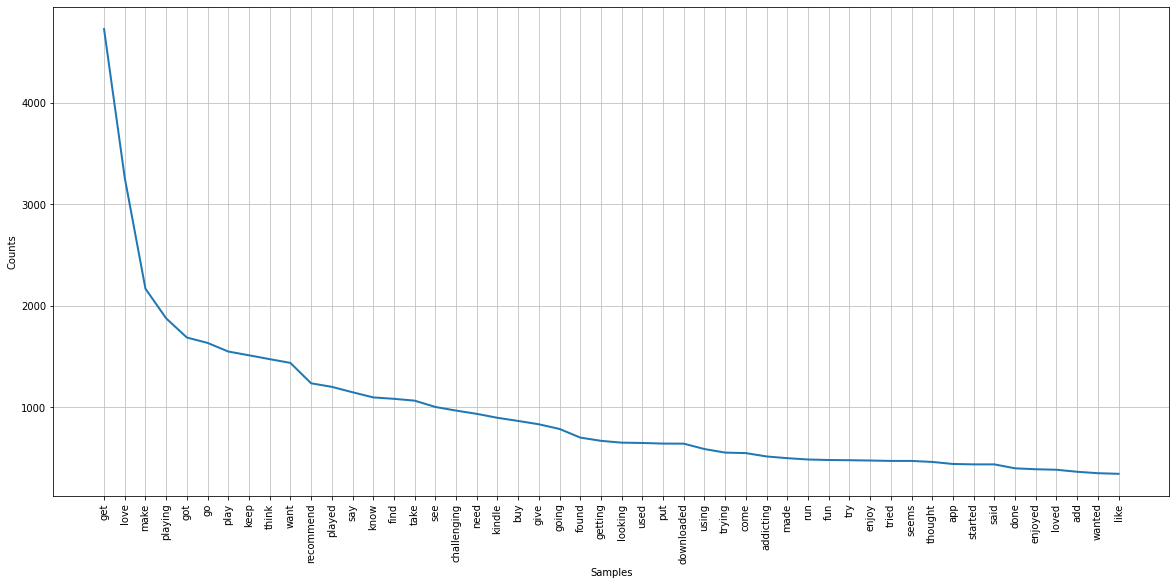

In [203]:
POS_freq(df['Verbs'])

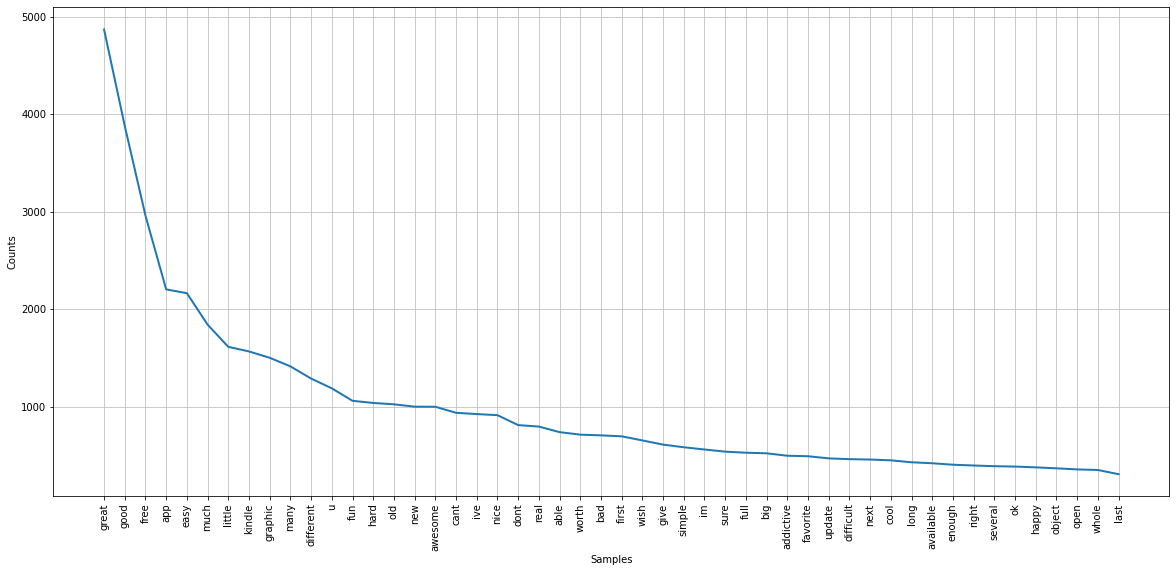

In [204]:
POS_freq(df['Adjectives'])

In [205]:
NER = spacy.load("en_core_web_sm")

In [206]:
def most_frequent_entities():
  named_entities = []
  for sentence in text:
    sentence = NER(sentence)
    entity = ''
    named_entity = None
    
    for word in sentence:
      term = word.text 
      tag = word.ent_type_

      if tag:
        entity = ' '.join([entity, term])
        entity = entity.strip()
        named_entity = (entity, tag)
      
      named_entities.append(named_entity)

  named_entities = [i for i in named_entities if i]
  entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])

  most_frequent_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type']).size().sort_values(ascending=False))
  most_frequent_entities = most_frequent_entities.reset_index().rename(columns={0 : 'Frequency'})
  print(most_frequent_entities.iloc[:,:100])


In [207]:
most_frequent_entities()

                  Entity Name Entity Type  Frequency
0                         one    CARDINAL      22215
1                         app         ORG      19040
2                       first     ORDINAL       8719
3                       three    CARDINAL       2256
4                     one one    CARDINAL       2154
...                       ...         ...        ...
17955                hesitant         ORG          1
17956      herman cain herman      PERSON          1
17957                  herman      PERSON          1
17958  heri taylor app minute        TIME          1
17959                       -        TIME          1

[17960 rows x 3 columns]


In [208]:
def key_words(n):

  kwargs = {
            'ngram_range': (1, 2), 
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word', 
            'min_df': 2,
    }
  vectorizer = TfidfVectorizer(**kwargs)
  tfidf_matrix = vectorizer.fit_transform(df['reviewText'])
  important_words_indices = np.argsort(np.asarray(tfidf_matrix.sum(axis=0))[0])[::-1]
  tfidf_feature_names = np.array(vectorizer.get_feature_names())
  print(tfidf_feature_names[important_words_indices[:n]])
  importance = np.asarray(tfidf_matrix.sum(axis=0))[0]
  plt.figure(figsize=(20, 10))
  plt.plot(tfidf_feature_names[important_words_indices[:n]], importance[important_words_indices[:n]])
  plt.xticks(rotation = 45)
  plt.xlabel("Key Words")
  plt.ylabel("Importance")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['game' 'app' 'fun' 'like' 'love' 'play' 'get' 'great' 'time' 'one'
 'really' 'good' 'would' 'kindle' 'dont' 'free' 'playing' 'easy' 'much'
 'use' 'lot' 'work' 'make' 'level' 'fire' 'keep' 'think' 'recommend' 'im'
 'way']


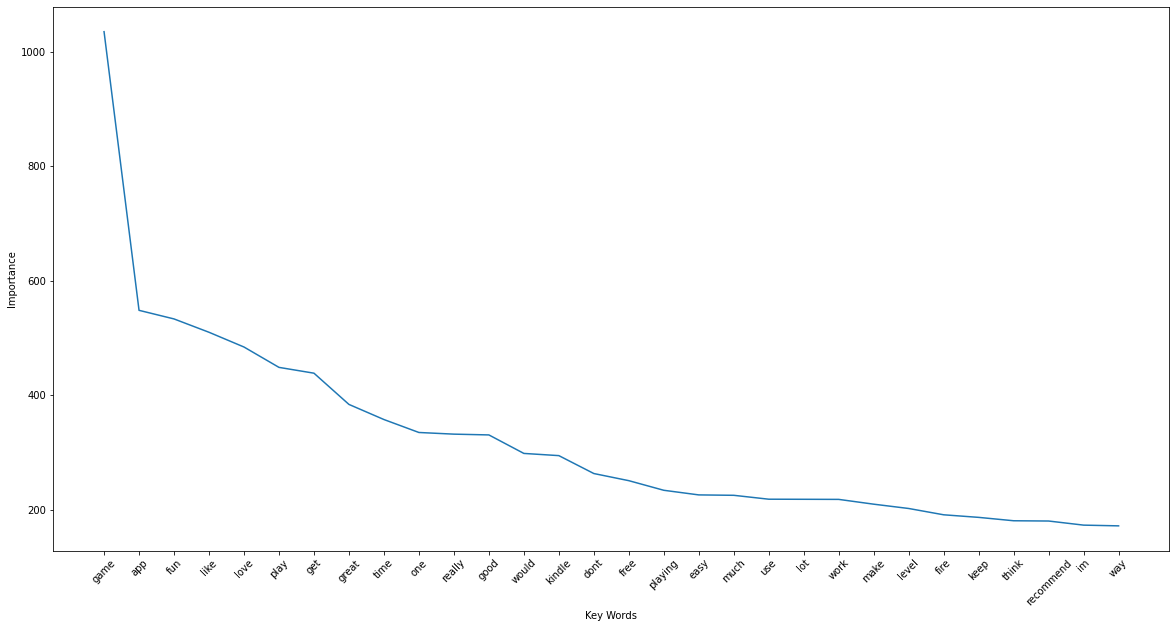

In [209]:
key_words(30)

In [210]:
def rank_vs_freq():
  frequency = {}
  rank = 1
  
  for word in words:
    count = frequency.get(word , 0)
    frequency[word] = count + 1
  df1 = pd.DataFrame(columns = ['Rank', 'Frequency'])

  for word , freq in sorted(frequency.items(), key=itemgetter(1), reverse = True):
    df1.loc[word] = [rank, freq]
    rank = rank + 1

  plt.figure(figsize=(10,10)) 
  plt.plot(df1['Rank'], df1['Frequency']) 
  plt.ylabel("Frequency")
  plt.xlabel("rank")
  plt.xticks(rotation=45)    
  plt.show()

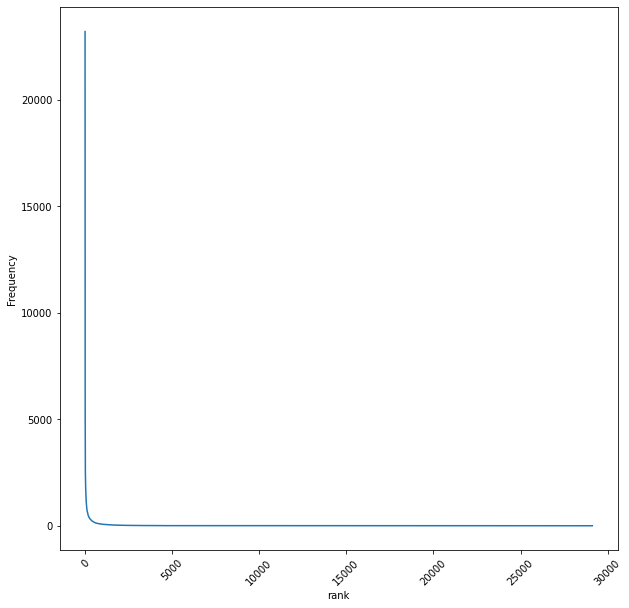

In [211]:
rank_vs_freq()